In [21]:
import os
import keras 
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [22]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [23]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
        elif ".jpeg" in file:
            paths.append(os.path.join(r, file))
        elif ".JPG" in file:
            paths.append(os.path.join(r, file))
        

for path in paths:
    img = Image.open(path)
    img = img.resize((227,227))
    img = np.array(img)
    if(img.shape == (227,227,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        flipped_img = np.flip(img, 1)
        data.append(flipped_img)
        result.append(encoder.transform([[0]]).toarray())

In [24]:

paths = []
skipped_paths=[]
for r, d, f in os.walk(r"brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
        elif ".jpeg" in file:
            paths.append(os.path.join(r, file))
        elif ".JPG" in file:
            paths.append(os.path.join(r, file))


for path in paths:
    img = Image.open(path)
    img = img.resize((227,227))
    img = np.array(img)
    if(img.shape == (227,227,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())
        flipped_img = np.flip(img, 1)
        data.append(flipped_img)
        result.append(encoder.transform([[1]]).toarray())
    else:
        skipped_paths.append(path)

print("Skipped image paths:")
for path in skipped_paths:
    print(path)
    img = Image.open(path)
    img = np.array(img)
    img=np.resize(img,(227,227,3))
    print(img.size)

Skipped image paths:
brain_tumor_dataset/no/No18.jpg
(442, 454)
(442, 454)
brain_tumor_dataset/no/no 98.jpg
(728, 725)
(728, 725)
brain_tumor_dataset/no/1 no.jpeg
(630, 630)
(630, 630)
brain_tumor_dataset/no/No15.jpg
(393, 400)
(393, 400)
brain_tumor_dataset/no/no 94.jpg
(630, 630)
(630, 630)
brain_tumor_dataset/no/no 99.jpg
(409, 442)
(409, 442)
brain_tumor_dataset/no/no 95.jpg
(275, 301)
(275, 301)
brain_tumor_dataset/no/no 5.jpeg
(442, 442)
(442, 442)
brain_tumor_dataset/no/N15.jpg
(225, 225)
(225, 225)
brain_tumor_dataset/no/no 96.jpg
(550, 664)
(550, 664)
brain_tumor_dataset/no/N3.jpg
(220, 275)
(220, 275)
brain_tumor_dataset/no/48 no.jpeg
(630, 630)
(630, 630)
brain_tumor_dataset/no/N21.jpg
(1024, 1024)
(1024, 1024)
brain_tumor_dataset/no/no 4.jpg
(220, 275)
(220, 275)
brain_tumor_dataset/no/No21.jpg
(442, 442)
(442, 442)
brain_tumor_dataset/no/No17.jpg
(393, 400)
(393, 400)
brain_tumor_dataset/no/no.jpg
(512, 512)
(512, 512)
brain_tumor_dataset/no/No13.jpg
(442, 442)
(442, 442)


In [25]:
data = np.array(data)
print(data.shape)

(432, 227, 227, 3)


In [26]:
result = np.array(result)
result = result.reshape(432,2)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [28]:
from keras.layers import Dropout

model = Sequential()

model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), input_shape=(227, 227, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid')) 

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation= 'relu'))
model.add(Dense(2, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print(model.summary())


/home/yashd-dev/Documents/tumor-detection/env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │         2,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,380,346 (237.96 MB)

 Trainable params: 62,380,346 (237.96 MB)

 Non-trainable params: 0 (0.00 B)

None


In [29]:
y_train.shape

(345, 2)

In [30]:
x_train.shape

(345, 227, 227, 3)

In [31]:
history = model.fit(x_train, y_train, epochs=30, batch_size=40, verbose=1, validation_split=0.1)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.4909 - loss: 433.4223 - val_accuracy: 0.6857 - val_loss: 0.6895
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6209 - loss: 0.6640 - val_accuracy: 0.7143 - val_loss: 0.7255
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7040 - loss: 0.5865 - val_accuracy: 0.5714 - val_loss: 0.6723
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7265 - loss: 0.5718 - val_accuracy: 0.5143 - val_loss: 1.6779
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6671 - loss: 0.7778 - val_accuracy: 0.6571 - val_loss: 0.8104
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6347 - loss: 0.6307 - val_accuracy: 0.6571 - val_loss: 0.7863
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6393 - loss: 0.6023 - val_accuracy: 0.6571 - val_loss: 0.6960
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6367 - loss: 0.5867 - val_accuracy: 0.6857 - val_loss: 0.7070
Epoch 

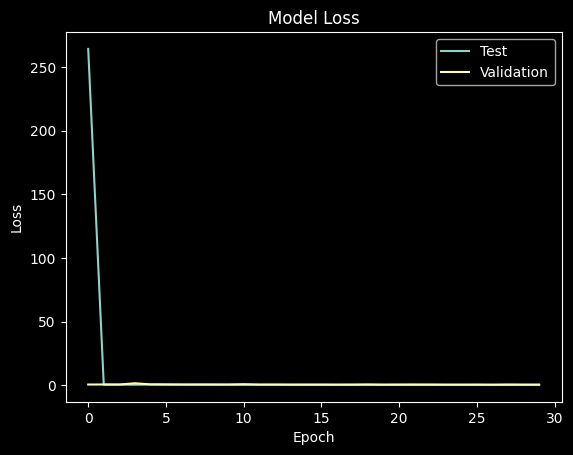

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

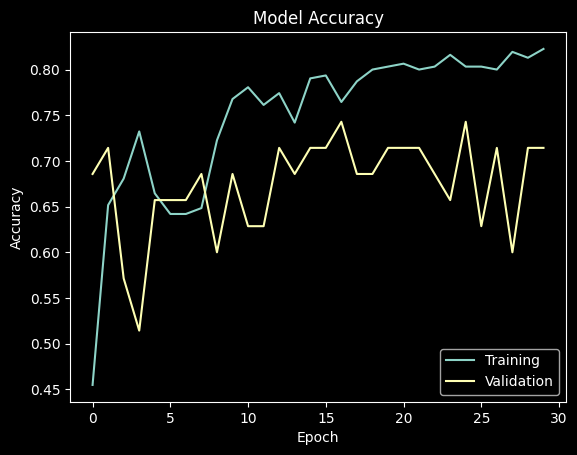

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()


In [34]:
# Evaluate the model
test_loss = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.6672 - loss: 0.5636
Test Loss: [0.543980598449707, 0.6781609058380127]


In [35]:
from sklearn.metrics import accuracy_score

# Predict probabilities for test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute test accuracy
test_accuracy = accuracy_score(y_true, y_pred)

print("Test Accuracy:", test_accuracy*100)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step
Test Accuracy: 67.81609195402298


In [36]:
from sklearn.metrics import f1_score

# Compute F1-score
f1 = f1_score(y_true, y_pred)

print("F1 Score:", f1)


F1 Score: 0.46153846153846156


In [37]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step


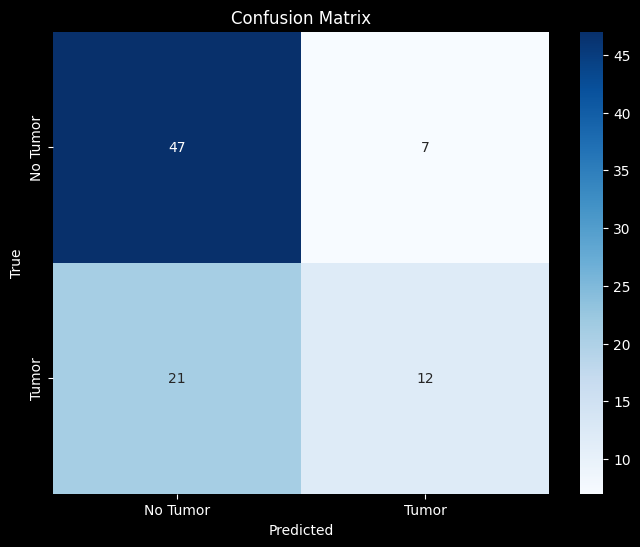

In [38]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities for test set
y_pred_probs = model.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No Tumor', 'Tumor'], 
            yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


69.98840570449829% Confidence This Is A Its a Tumor


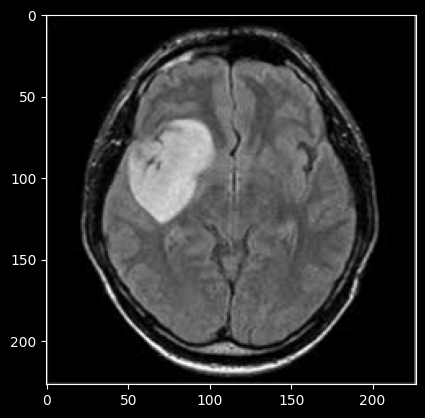

In [46]:
from matplotlib.pyplot import imshow
img = Image.open(r"brain_tumor_dataset/yes/Y4.jpg")
x = np.array(img.resize((227,227)))
x = x.reshape(1,227,227,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img.resize((227,227)))
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))
model.save('loc.keras') 

In [ ]:
print("Example Predictions:")
for i in range(10):
    actual_class = "Tumor" if y_true[i] == 1 else "No Tumor"
    predicted_class = "Tumor" if y_pred[i] == 1 else "No Tumor"
    print(f"Example {i+1}: Actual - {actual_class}, Predicted - {predicted_class}, Probabilities: {y_pred_probs[i]}")


Example Predictions:
Example 1: Actual - No Tumor, Predicted - No Tumor, Probabilities: [0.99128175 0.00871827]
Example 2: Actual - Tumor, Predicted - Tumor, Probabilities: [0.10823027 0.89176965]
Example 3: Actual - No Tumor, Predicted - Tumor, Probabilities: [0.25176397 0.7482361 ]
Example 4: Actual - No Tumor, Predicted - Tumor, Probabilities: [0.01320004 0.98679996]
Example 5: Actual - No Tumor, Predicted - Tumor, Probabilities: [0.01615749 0.9838425 ]
Example 6: Actual - No Tumor, Predicted - No Tumor, Probabilities: [0.7969393 0.2030607]
Example 7: Actual - Tumor, Predicted - No Tumor, Probabilities: [0.7504867  0.24951334]
Example 8: Actual - No Tumor, Predicted - No Tumor, Probabilities: [0.8428577  0.15714227]
Example 9: Actual - No Tumor, Predicted - No Tumor, Probabilities: [0.89121145 0.10878855]
Example 10: Actual - No Tumor, Predicted - No Tumor, Probabilities: [0.73420656 0.2657934 ]
